In [2]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list
import matplotlib.pyplot as plt
import seaborn as sns
# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")
    mydb.close()
db = "asx"    

id: ········
password: ········
Connection Successful


In [3]:
mydb = connect_mysql(host, id, pwd, db)
#Select ASX Index transactions only

query =  """
SELECT Code, Date, Close 
FROM asx_history
WHERE Code = 'AXJO' 
"""
asx_axjo = pd.read_sql_query(query, 
                             con=mydb,
                            parse_dates = ["Date"])
mydb.close()
asx_axjo = asx_axjo.drop(columns=['Code']).sort_values(by = "Date" , ascending=True)

In [4]:
mydb = connect_mysql(host, id, pwd, db = "asx")
query =  \
"""
SELECT *
FROM exchange_rate

"""
exchange_rate= pd.read_sql_query(query, 
                                 con=mydb,
                                parse_dates = ["Date"])
mydb.close()

In [5]:
mydb = connect_mysql(host, id, pwd, db)
#Select ASX Index transactions only

query =  """
SELECT Date, CashRate 
FROM cashrate
"""
cashrate = pd.read_sql_query(query, 
                             con=mydb,
                            parse_dates = ["Date"])
# asx_axjo["Date"]=  pd.to_datetime(asx_axjo["Date"])
mydb.close()

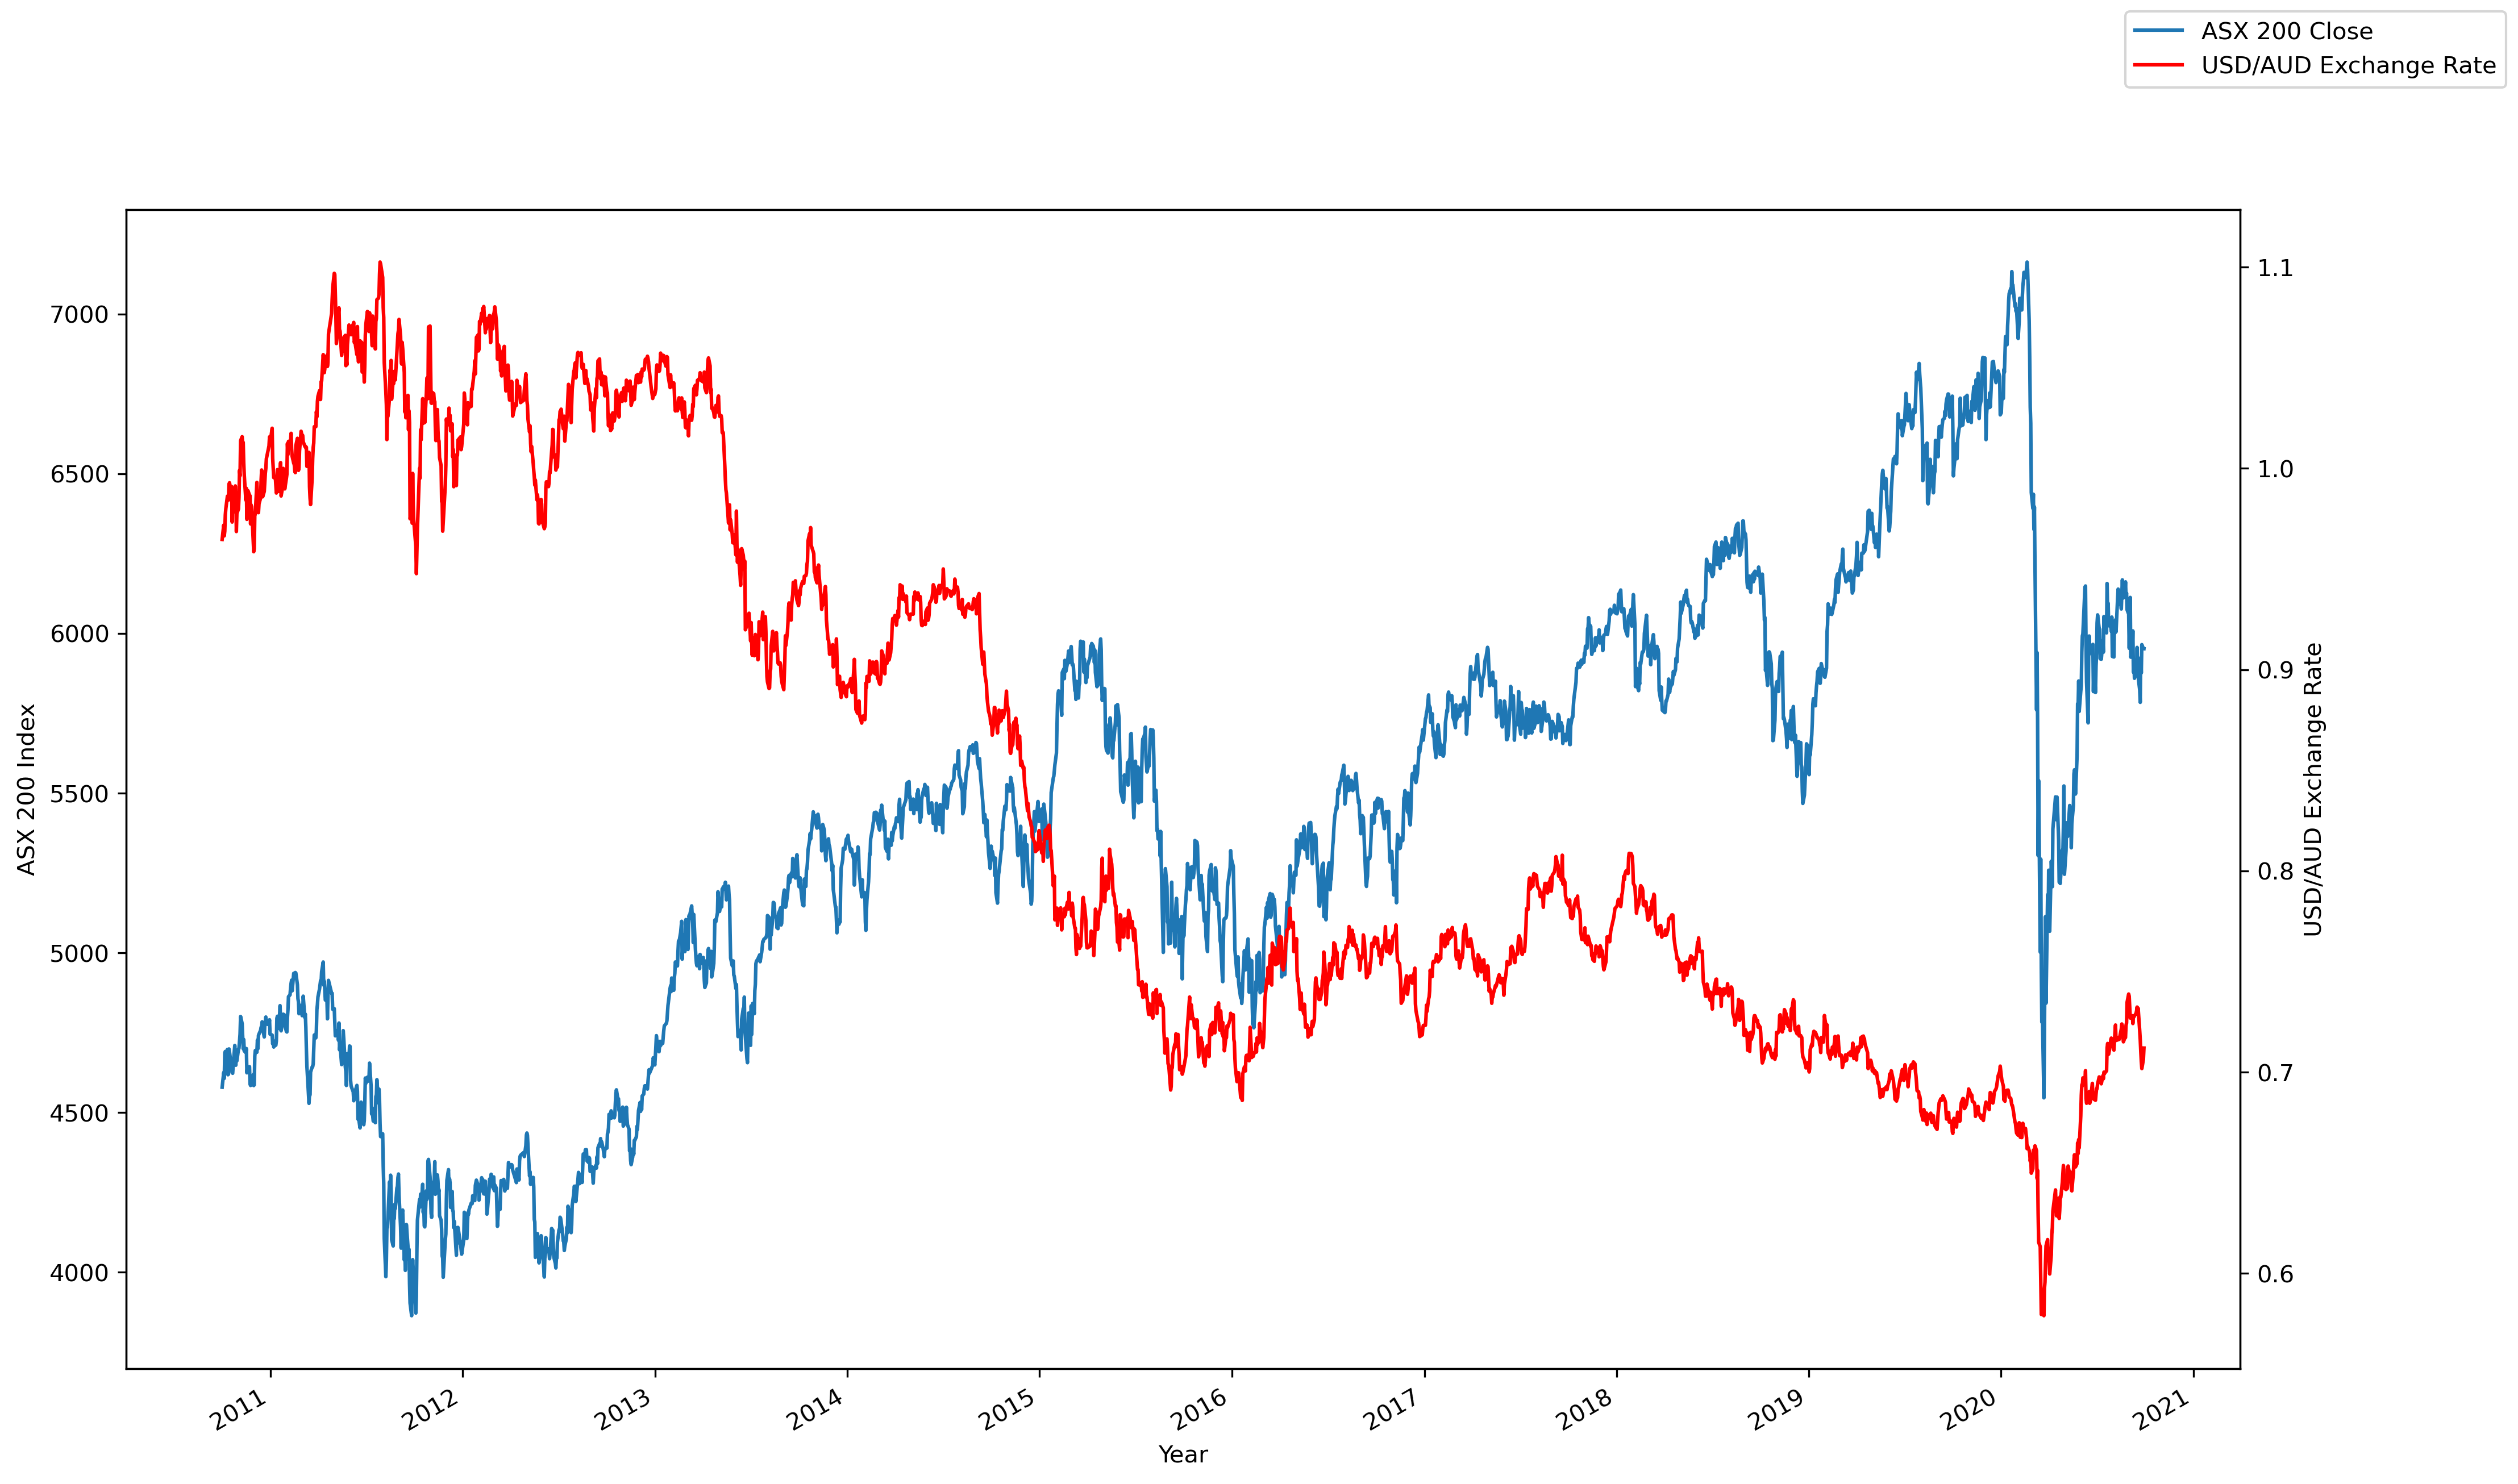

In [36]:
fig = plt.figure(figsize = (16,10), dpi = 300)
ax = fig.add_subplot(111)
df = asx_axjo.merge(exchange_rate, on = "Date", how = "right").dropna()
ax = df.plot(x="Date", y="Close", legend=False, ax = ax)
ax2 = ax.twinx()
df.plot(x="Date", y="Rate", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='ASX 200 Index')
ax2.set(ylabel='USD/AUD Exchange Rate')
ax.figure.legend(["ASX 200 Close", "USD/AUD Exchange Rate"],)
plt.show()

Between 2011 and 2015, THere was a inverse relationship between exchange rate and the share price. However, the ASX 200 moved in line with the share price between 2015 and 2016. During the early 2020, there was a huge drop in the share price, the price has dropped more than 35% due to the outbreak of COVID-19. The Australian dollar also lost its value by more than 20% compared to US dollar. In other words, If an US investor was holding the ASX 200 share fund, the investor lost close to 50% of the market value when translated to US dollar. However, there was a V-shaped recovery shortly after the initial COVID-19 period. The value of the Australian dollar is actually higher compared to the pre-COVID-19 period. This may indicate that the Australia is currently handling the COVID-19 better the US and the economic condition in Australia improved fastre. The ASX 200 index is currently valued between $5,500 and $6,000.

In [37]:
df = asx_axjo
df["CashRate"] = 0
for i in range(len(cashrate)-1):
    df.loc[(df['Date'] >= cashrate.Date[i]) & (df['Date'] < cashrate.Date[i+1]),"CashRate"] = cashrate["CashRate"][i] 
    #     if sum((df.Date.dt.month == row.Date.month) &  (df.Date.dt.year == row.Date.year)):
#         df.loc[(df.Date.dt.month == row.Date.month) &  (df.Date.dt.year == row.Date.year),"CashRate"] = row["CashRate"]
df.CashRate = df.CashRate.astype(float) 

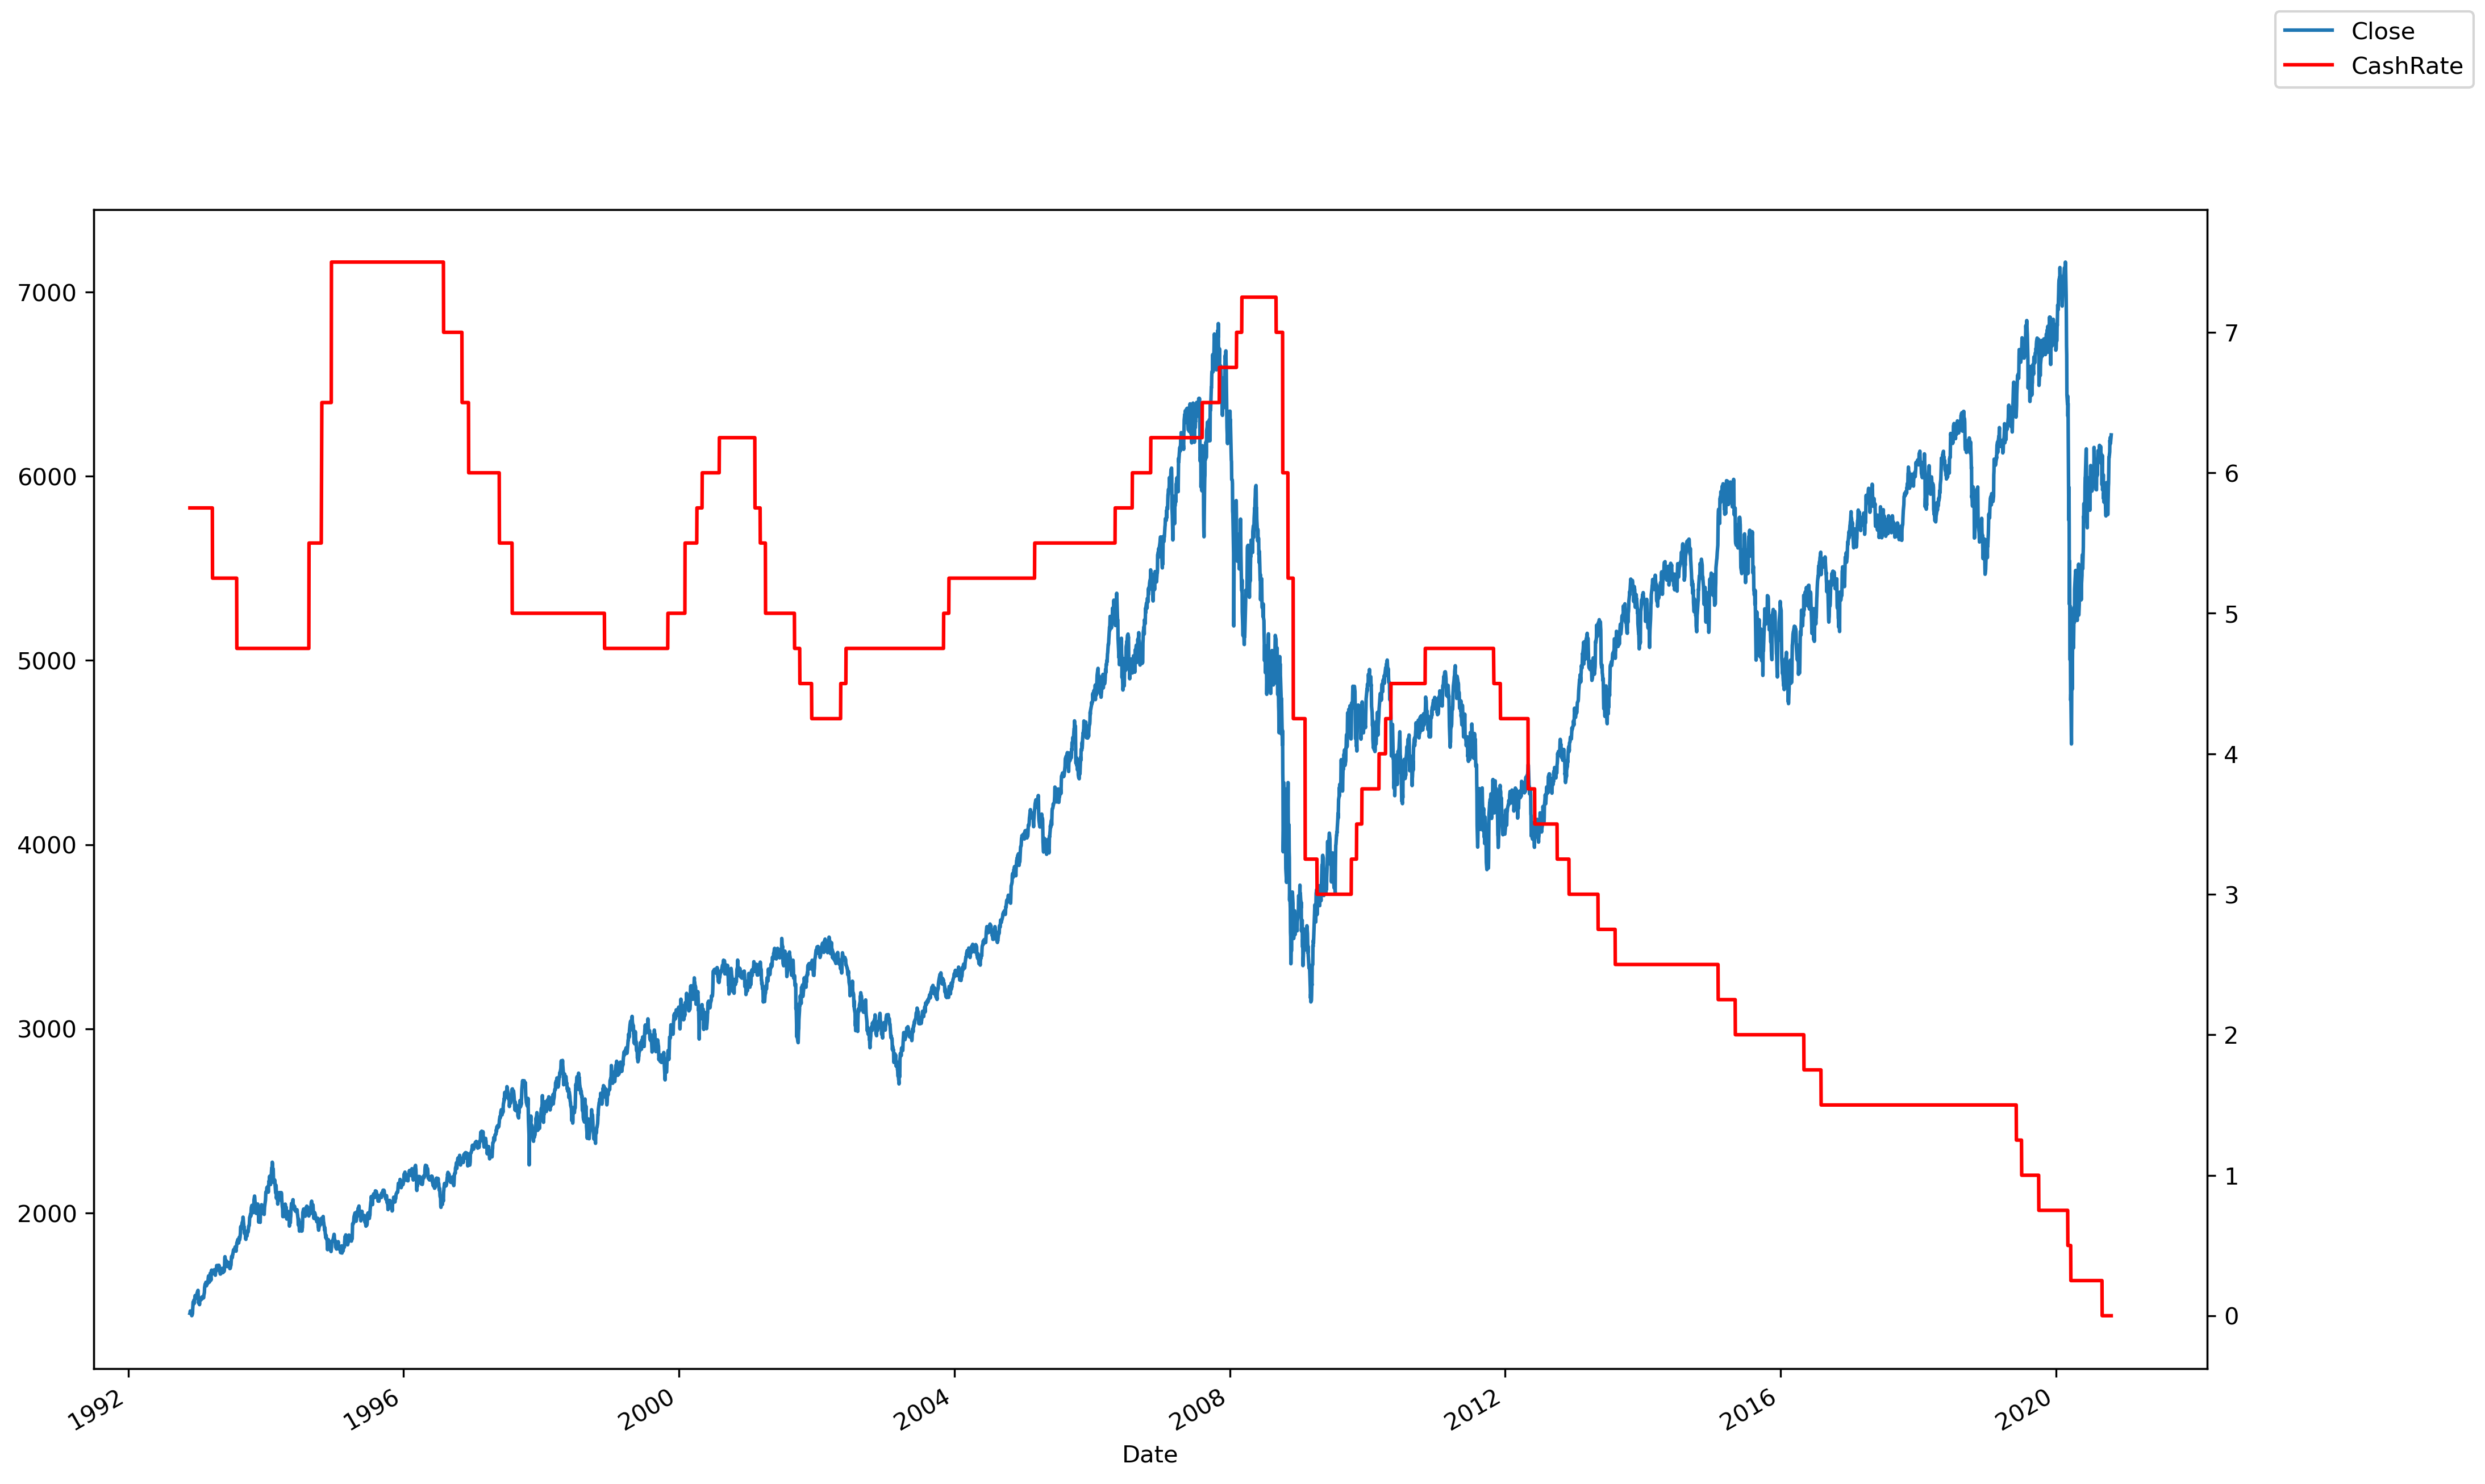

In [39]:
fig = plt.figure(figsize = (16,10), dpi = 300)
ax = fig.add_subplot(111)
# df = asx_axjo.merge(cashrate, on = "Date", how = "right").dropna()
ax = df.plot(x="Date", y="Close", legend=False, ax = ax)
ax2 = ax.twinx()
df.plot(x="Date", y="CashRate", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

The cash rate is the indicator of the performance of the econonym. Between 1992 and 2008, the ASX 200 has gone

In [34]:
# from datetime import datetime
# str(row.Date).split(' ')[0]
# len(cashrate)
# i = 40
# print(i)
# (df['Date'] > cashrate.Date[i])

df

# df.loc[(df['Date'] > cashrate.Date[i]) & (df['Date'] < cashrate.Date[i+1])]
# df.loc[df["Date"] == "1992-11-23"]
# pd.DatetimeIndex(row[['Date']])
# datetime.strptime(str(row.Date), '%Y-%m-%d') 

,Date,Close,CashRate
0,1992-11-23,1455.00000,5.75
1,1992-11-24,1458.40002,5.75
2,1992-11-25,1467.90002,5.75
3,1992-11-26,1459.00000,5.75
4,1992-11-27,1458.90002,5.75
...,...,...,...
7051,2020-10-13,6195.70020,0.00
7052,2020-10-14,6179.20020,0.00
7053,2020-10-15,6210.29981,0.00
7054,2020-10-16,6176.79981,0.00


In [33]:
# df['DaysDiff'] = (df['Date'] - df["Date"].iloc[0]).dt.days
days = df["DaysDiff"].iloc[-1]
daily_growth =  (df['Close'].iloc[-1]/df['Close'].iloc[0])**(1/days)
df['AdjClose'] = df['Close'] / (daily_growth ** (df["DaysDiff"]))

KeyError: 'DaysDiff'

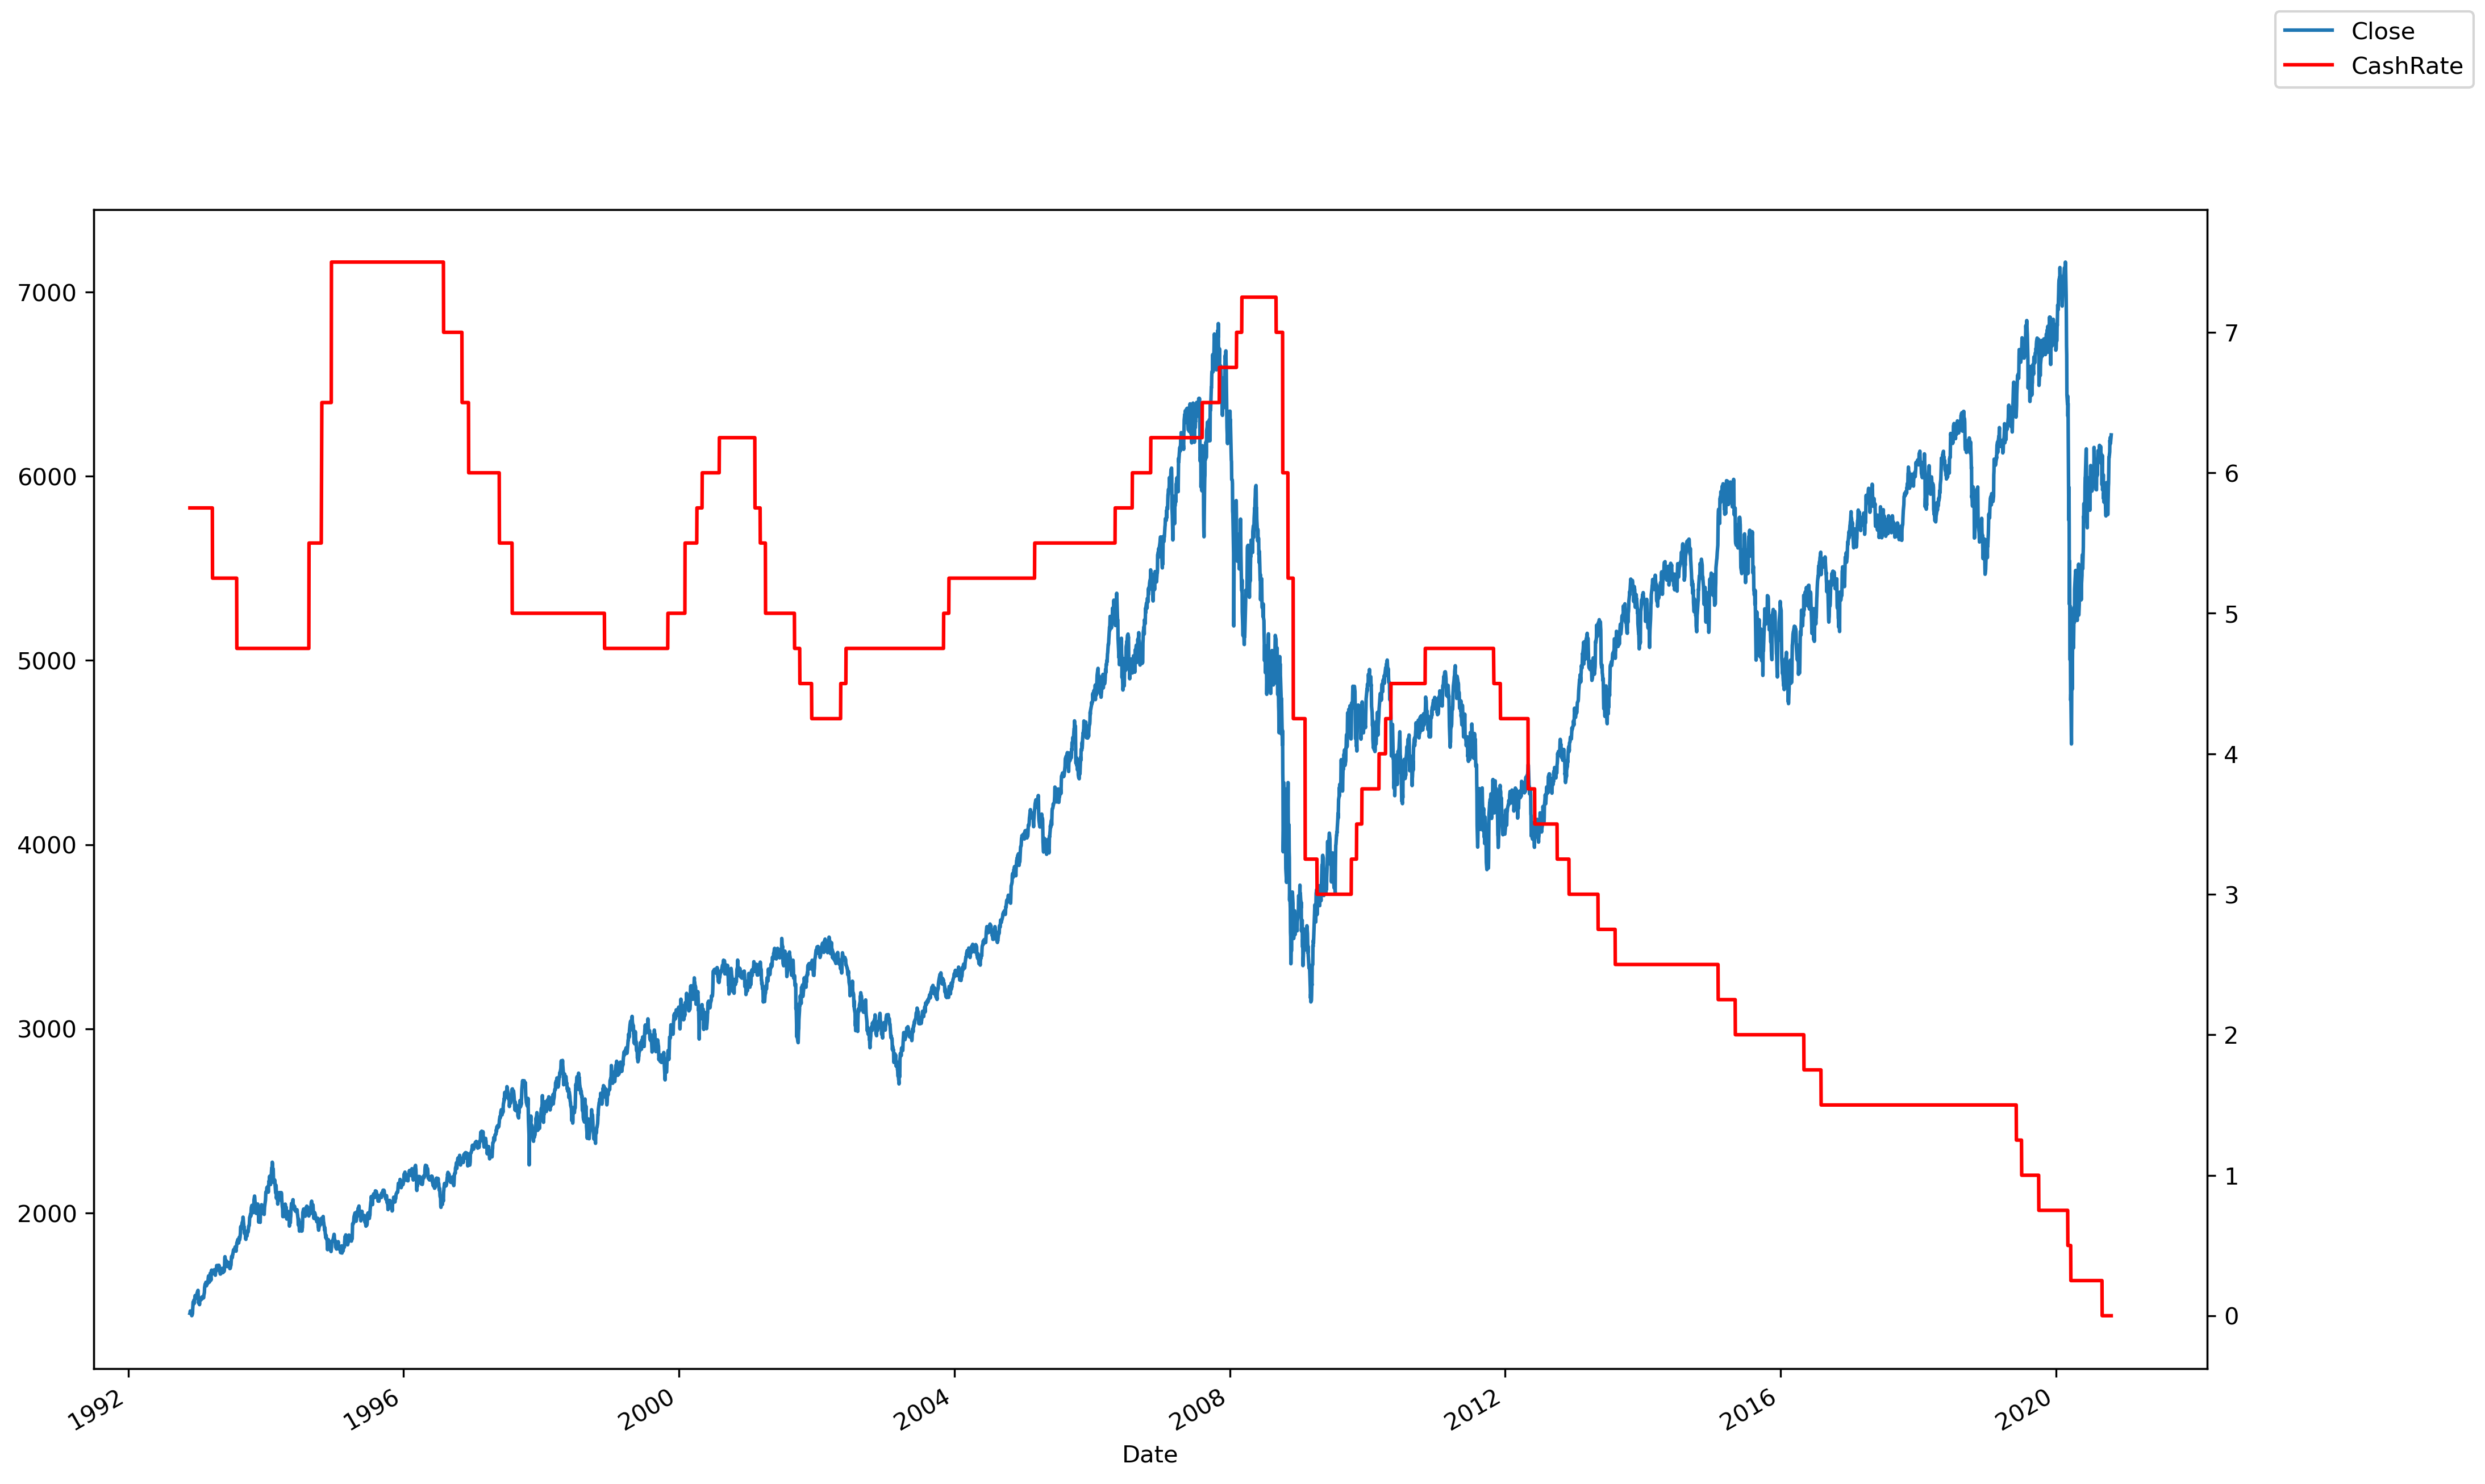

In [35]:

# 

sns.regplot(data=df, x="Rate", y="AdjClose")

KeyError: 'Rate'

In [82]:
ELECT *
FROM GDP_history_year

"""
exchange_rate= pd.read_sql_query(query, con=mydb)
# exchange_rate["Date"]=  pd.to_datetime(exchange_rate["Date"])

mydb.close()

In [106]:
asx_axjo.Close/1455


0       1.000000
1       1.002337
2       1.008866
3       1.002749
4       1.002680
          ...   
7050    4.214433
7051    4.258213
7052    4.246873
7053    4.268247
7054    4.245223
Name: Close, Length: 7055, dtype: float64

In [105]:
asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first')

Code
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
         ...  
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
AXJO    1455.0
Name: Close, Length: 7055, dtype: float64

In [117]:
import numpy as np
np.divide(asx_axjo.Close.to_numpy(), asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first').to_numpy())

array([1.        , 1.00233678, 1.00886599, ..., 4.24687299, 4.26824729,
       4.24522324])

In [133]:
asx_axjo.Close/ asx_axjo.set_index(['Code']).groupby(['Code'])['Close'].transform('first').reset_index()

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [143]:
mydb = connect_mysql(host, id, pwd, db)
query =  \
"""
SELECT Code, Date, Close
FROM asx_history

"""
df= pd.read_sql_query(query, con=mydb)
print(df)
mydb.close()

       Code        Date      Close
0       ABC  1988-01-29    1.70226
1       ALQ  1988-01-29    0.27083
2       AMC  1988-01-29    2.10952
3       ANN  1988-01-29   15.03350
4       ANZ  1988-01-29    3.20574
...     ...         ...        ...
828949  WPR  2020-10-16    2.70000
828950  WSA  2020-10-16    2.26000
828951  WTC  2020-10-16   27.77000
828952  XRO  2020-10-16  114.55000
828953  Z1P  2020-10-16    7.02000

[828954 rows x 3 columns]


In [157]:
df['Close_index'] =  (df.set_index(['Code']).Close/df.set_index(['Code']).groupby(['Code']).transform('first').Close).reset_index()['Close']

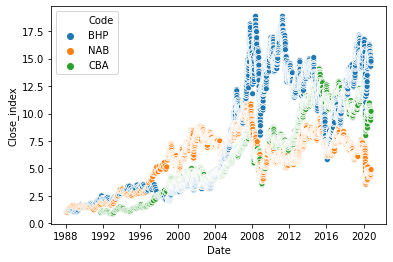

In [185]:
sns.scatterplot(data = df[df['Code'].isin(['CBA', 'BHP', 'NAB'])], x = "Date", y = "Close_index", hue = "Code")